#### Importando bibliotecas

In [ ]:
# Manipulação de dados
import pandas as pd

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Avaliando Modelos
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Importando dados com o pandas

In [ ]:
df = pd.read_csv('vendas_marketing.csv')

#### Visualizando a parte inicial do DataFrame importado

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


#### Visualizando a parte final do DataFrame importado

In [ ]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


Cada linha do DataFrame é uma campanha publicitária. Sendo que os valores abaixo de TV, Radio e Newspaper é o valor investido em cada um desses meios e o em Sales são as vendas que foram feitas no período correspondente a essa campanha.


#### Apresentando informações concisas sobre o conjunto de dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


O DataFrame não apresenta valores nulos em nenhuma das colunas e todas elas contém dados do tipo float.

#### Obtendo o tamnho do DataFrame

In [ ]:
df.shape

(200, 4)

#### Apresentando informações de estatística descritiva dos dados

In [ ]:
df.describe().round(2)

,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,15.13
std,85.85,14.85,21.78,5.28
min,0.70,0.00,0.30,1.60
25%,74.38,9.98,12.75,11.00
50%,149.75,22.90,25.75,16.00
75%,218.82,36.52,45.10,19.05
max,296.40,49.60,114.00,27.00


#### Visualização de dados

Plotando o gráfico boxplot utilizando a biblioteca matplotlib para mostrar a distribuição dos dados referentes a TV

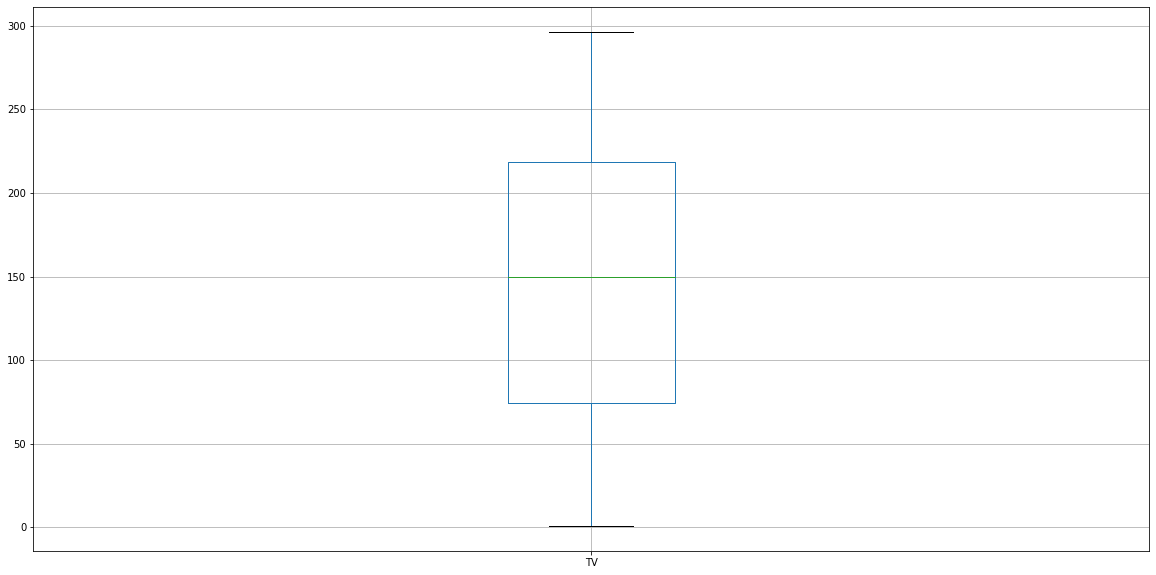

In [ ]:
plt.figure(figsize=(20,10))
df.boxplot('TV')
plt.show()

Fazendo o mesmo só que agora para os dados referentes ao Rádio

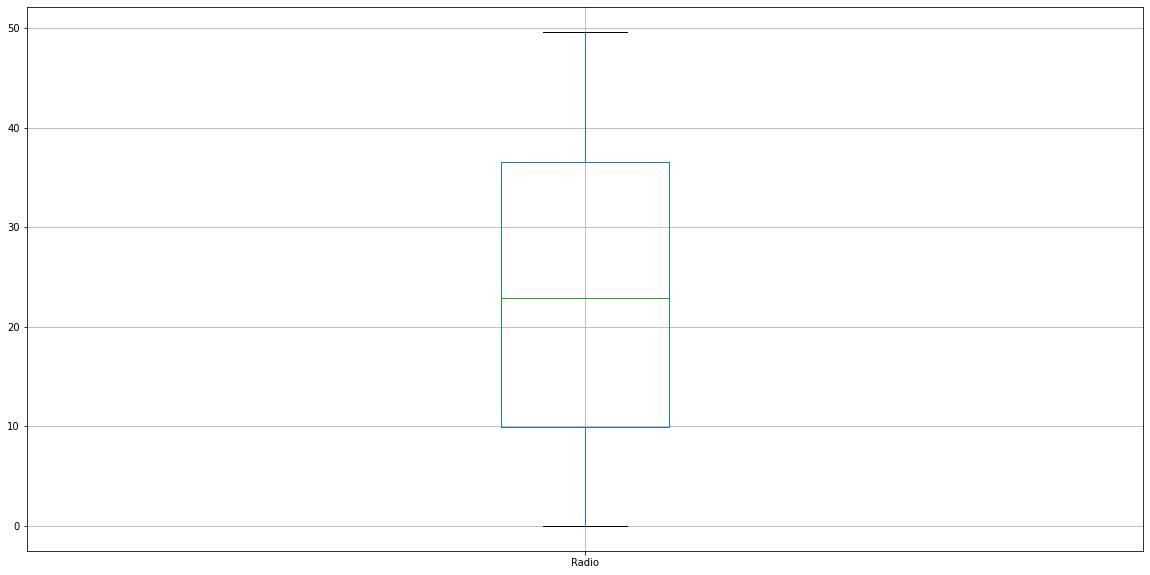

In [ ]:
plt.figure(figsize=(20,10))
df.boxplot('Radio')
plt.show()

Por último, fazendo a análise para o jornal.

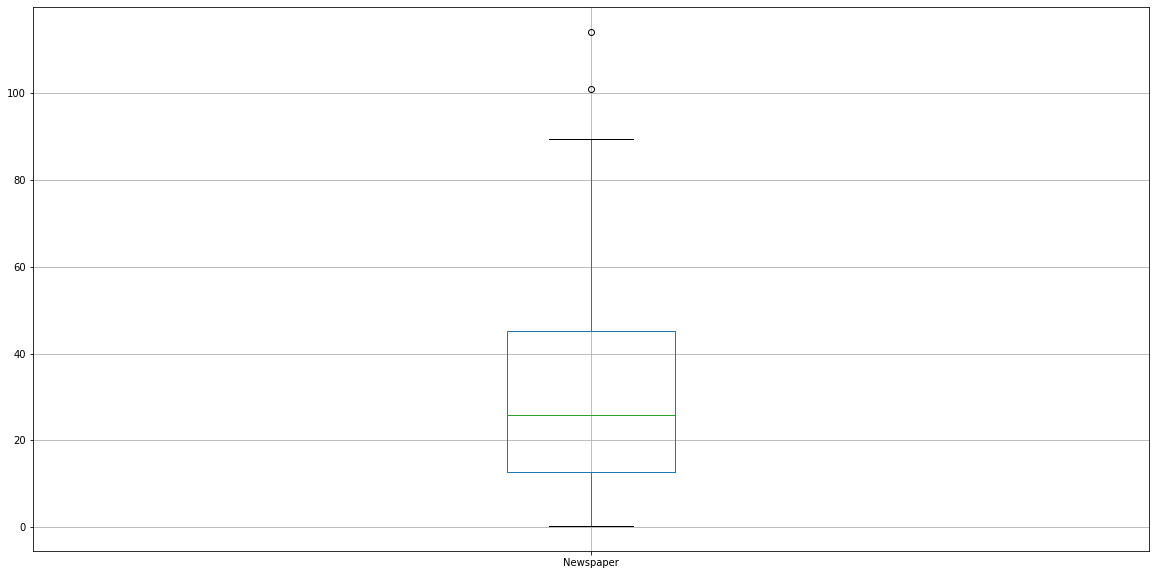

In [ ]:
plt.figure(figsize=(20,10))
df.boxplot('Newspaper')
plt.show()

Pode-se observar que o boxplot do jornal apresenta outliers, que nada mais são que valores discrepantes dos dados.

Agora, será feito os mesmos boxplot que anteriormente mas utilizando a biblioteca seaborn, para visualizar as diferenças entre elas.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


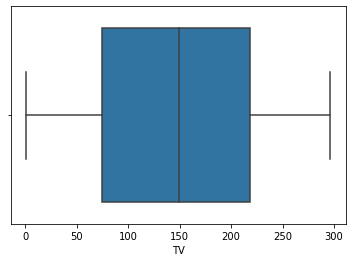

In [ ]:
sns.boxplot(df['TV'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


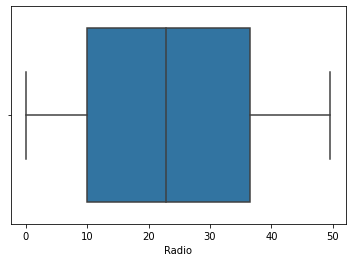

In [ ]:
sns.boxplot(df['Radio'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


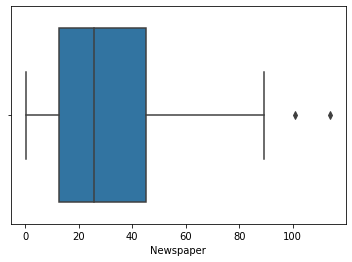

In [ ]:
sns.boxplot(df['Newspaper'])
plt.show()

A seguir foi plotado gráficos do tipo pairplot. Esse tipo de gráfico tem a finalidade de demonstrar como duas variáveis se relacionam. No caso, está sendo analisado como a TV, jornal e radio se relacionam com as vendas.

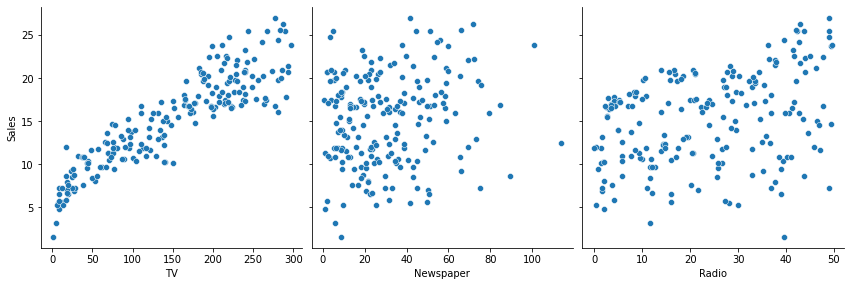

In [ ]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

No primeiro gráfico, que relaciona a TV e as vendas, é possível observar uma tendência aproximadamente linear, ou seja, há uma relação diretamente proporcional entre a quantidade de dinheiro investido em marketing na TV e as vendas.

Fazendo um heatmap para analisar a correlação entre as variáveis. O valor da correlação varia de 0 a 1. O que o heatmap vai fazer é associar esses valores a uma escala de cores, no qual cada valor terá uma cor associada.

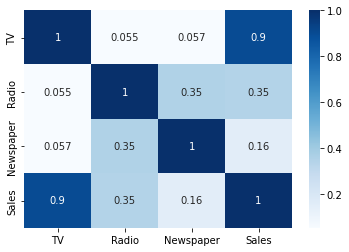

In [ ]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)

Abaixo está apresentado um pairplot só que mostrando a relação entre todas as variáveis umas com as outras.

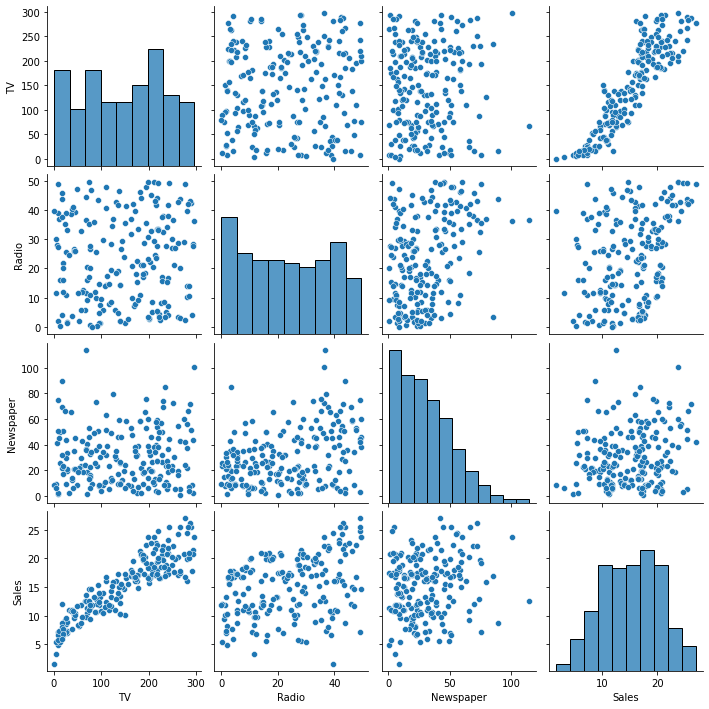

In [ ]:
sns.pairplot(df)

#### Implementação do Modelo de Machine Learning

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Definindo a variável X e a y

In [ ]:
X = df[['TV']]
y = df[['Sales']]

Visualizando o tamanho da variável X, que corresponde aos dados da TV

In [ ]:
X.shape

(200, 1)

Ver qual o tipo de dado está armazenado na variável X

In [ ]:
type(X)

pandas.core.frame.DataFrame

Fazendo a divisão dos dados de treino e dados de teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

Visualizando os dados de treino referentes a TV

In [ ]:
X_train.head()

,TV
74,213.4
3,151.5
185,205.0
26,142.9
90,134.3


Visualizando o tamanho do DataFrame dos dados de treino

In [ ]:
X_train.shape

(140, 1)

Visualizando o tamanho do DataFrame dos dados de teste

In [ ]:
X_test.shape

(60, 1)

Adicionando uma coluna no DataFrame contendo um valor constante

In [ ]:
X_train_sm = sm.add_constant(X_train)

In [ ]:
X_train_sm

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3
...,...,...
87,1.0,110.7
103,1.0,187.9
67,1.0,139.3
24,1.0,62.3


Adicionar essa constante é importante na hora de fazer o fit do método.

Fazendo a regressão linear e o fit do método utilizando os dados de treino referente a variável y e a X com a coluna de valores constantes adicionados

In [ ]:
lr = sm.OLS(y_train, X_train_sm).fit()

Parâmetros obtidos na regressão linear

In [ ]:
# Inclinação da reta e intercepto
lr.params

const    6.948683
TV       0.054546
dtype: float64

Visualizando um resumo do ajuste feito pela regressão linear

In [ ]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 09 Nov 2021   Prob (F-statistic):           1.52e-52
Time:                        21:17:57   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

#### Scikit-learn

Fazendo o mesmo procedimento feito anteriormente só que agora utilizando a biblioteca Scikit-learn

Regressão linear

In [ ]:
lr = LinearRegression()

In [ ]:
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Fit do método com os dados de treino. Sendo que agora, utilizando essa biblioteca não é necessário adicionar uma constante ao X_train 

In [ ]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Inclinação da reta obtida no ajuste

In [ ]:
lr.coef_

array([[0.05454575]])

Intercepto da reta

In [ ]:
lr.intercept_

array([6.9486832])

Usando o método predict para obter os resultados de y previstos a partir dos dados de dados de teste referentes a variável X

In [ ]:
pred = lr.predict(X_test)

Plotando um gráfico do tipo regplot para comparar os valores reais do y_test com os valores previsto pelo modelo, calculado na célula acima

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


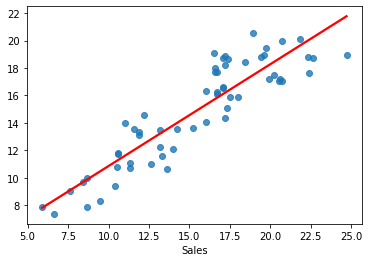

In [ ]:
sns.regplot(y_test, pred, line_kws={'color': 'red'}, ci=None)

#### Avalição

Verificando quanto da variação dos dados é explicada pelo modelo linear. Serve para avaliar a qualidade do modelo. 

In [ ]:
# Coeficiente de determinação
r2 = r2_score(y_test, pred)

In [ ]:
r2

0.7921031601245662

O erro quadrático médio calcula quão próximo a linha da regressão está dos pontos

In [ ]:
mse = mean_squared_error(y_test, pred)

In [ ]:
mse

4.077556371826948

#### Predição

Aplicando o modelo criado para predizer quanto será obtido em vendas a partir de um determinado valor investido com o marketing na TV

In [ ]:
valor_tv = float(input('Qual valor será gasto na Tv: '))

KeyboardInterrupt: ignored

In [ ]:
lr.predict([[valor_tv]])

In [ ]:
df.head()